# Data Mining Assignment - Attrition 

In [1]:
import warnings
warnings.filterwarnings('ignore') # ignore unneccesary warning, to improve readability.

import pandas as pd # import the library
df = pd.read_csv('Final dataset Attrition.csv') # Read the csv file
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract,NaN
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time,NaN
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract,NaN
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,NaN
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract,NaN


# 1. Exploratory Data Analysis (EDA) & PreProcessing

## 1.1 Statistical Analysis using pandas

In [2]:
df.describe()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Date_of_termination,Leaves,Absenteeism,Unnamed: 32
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,0.0,1470.000000,1470.000000,0.0
mean,36.923810,9.192517,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,7.008163,2.187755,4.123129,NaN,2.568707,1.525170,NaN
std,9.135373,8.106864,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,6.126525,3.222430,3.568136,NaN,1.716171,1.097856,NaN
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,NaN,1.000000,1.000000,NaN
50%,36.000000,7.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,NaN,3.000000,2.000000,NaN
75%,43.000000,14.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,NaN,4.000000,2.000000,NaN
max,60.000000,29.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,NaN,5.000000,3.000000,NaN


## 1.2 Brief Analysis of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   BusinessTravel           1470 non-null   object 
 3   Department               1470 non-null   object 
 4   DistanceFromHome         1470 non-null   int64  
 5   Gender                   1470 non-null   object 
 6   JobInvolvement           1470 non-null   int64  
 7   JobLevel                 1470 non-null   int64  
 8   JobRole                  1470 non-null   object 
 9   JobSatisfaction          1470 non-null   int64  
 10  MaritalStatus            1470 non-null   object 
 11  MonthlyIncome            1470 non-null   int64  
 12  NumCompaniesWorked       1470 non-null   int64  
 13  OverTime                 1470 non-null   object 
 14  PercentSalaryHike       

**Find the Null values in columns:** Found 2 columns having all rows as null.

In [4]:
df.isna().sum()

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Gender                        0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Higher_Education              0
Date_of_Hire                  0
Date_of_termination        1470
Status_of_leaving             0
Mode_of_work                  0
Leaves                        0
Absenteeism                   0
Work_accident                 0
Source_of_Hire                0
Job_mode

**Dropping the Null columns, found above.**

In [5]:
df.drop(["Date_of_termination", "Unnamed: 32"],axis=1, inplace=True) #axis =1 means drop the column, inplace=True commits changes to original data set.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Gender                   1470 non-null   object
 6   JobInvolvement           1470 non-null   int64 
 7   JobLevel                 1470 non-null   int64 
 8   JobRole                  1470 non-null   object
 9   JobSatisfaction          1470 non-null   int64 
 10  MaritalStatus            1470 non-null   object
 11  MonthlyIncome            1470 non-null   int64 
 12  NumCompaniesWorked       1470 non-null   int64 
 13  OverTime                 1470 non-null   object
 14  PercentSalaryHike        1470 non-null  

In [7]:
df.shape

(1470, 31)

**Remove duplicate rows if any, but no duplicates were found.**

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.shape

(1470, 31)

**Checking the dataset after dropping the columns**

In [10]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,YearsWithCurrManager,Higher_Education,Date_of_Hire,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,0,Graduation,21-01-2021,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,0,Graduation,13-03-2021,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,0,Post-Graduation,23-01-2021,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,0,PHD,25-04-2021,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,0,PHD,14-06-2021,Better Opportunity,WFH,5,2,No,Job Event,Contract


## 1.3 Univariate Analysis of the continous features using BoxPlots, for finding outliers.

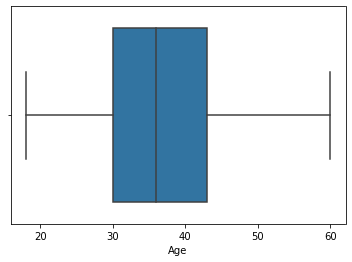

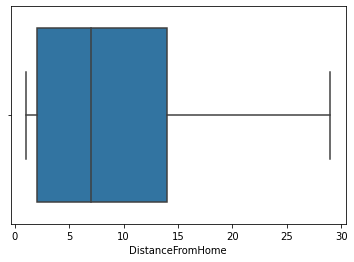

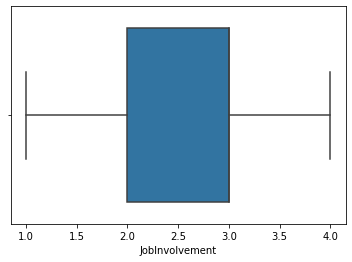

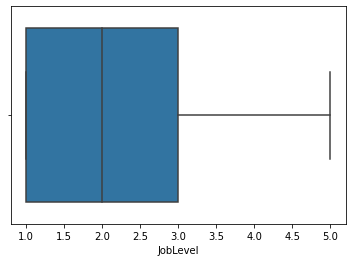

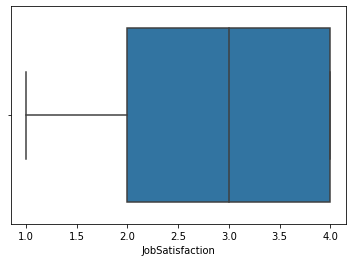

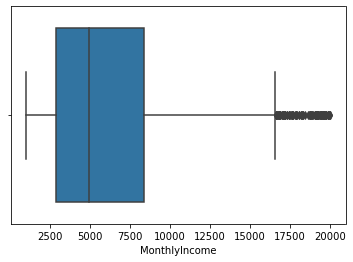

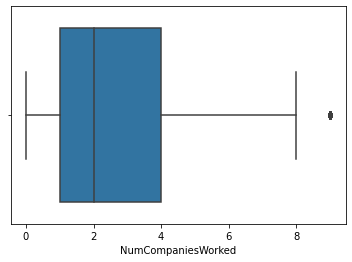

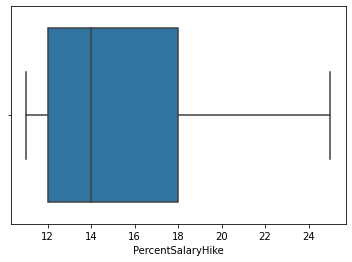

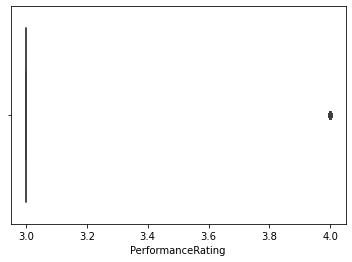

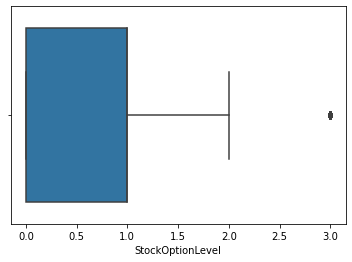

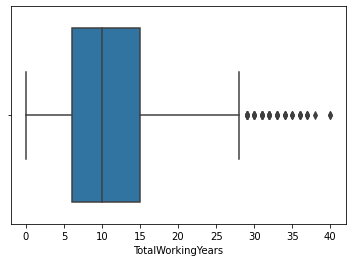

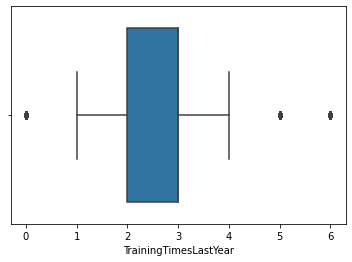

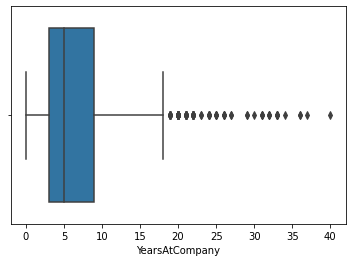

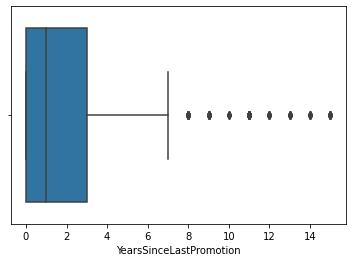

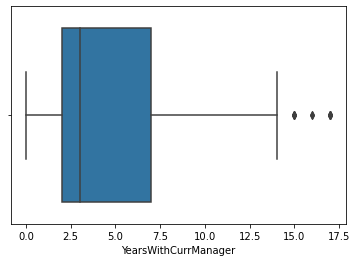

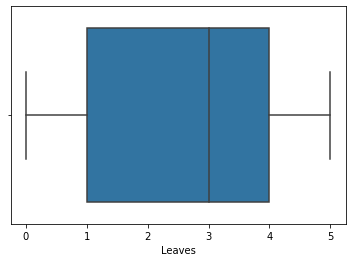

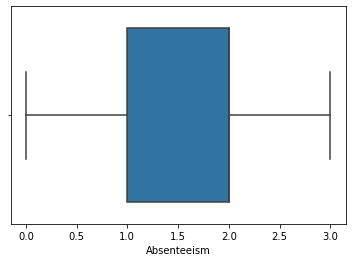

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.select_dtypes('int64').columns:
  sns.boxplot(df[i])
  plt.show()


**Some outliers were found using the above boxplots but upon scrutany found that they are not actual outliers.**

## 1.4 Histogram Analysis (continous features) & BoxPlot Analysis (categorical features) in the dataset

(array([ 57., 105., 224., 265., 255., 217., 131.,  92.,  77.,  47.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

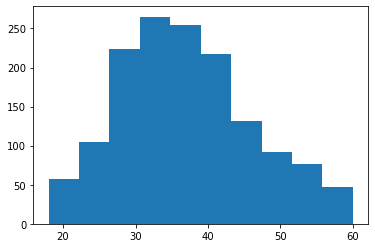

In [12]:
import matplotlib.pyplot as plt
plt.hist(df["Age"]) ##Histogram is for continous values.

**The above histogram looks like BELL curve. Normal distribution.**
**Max frequency is for age 30-40**


In [13]:
#To count catergorical variables, use count plot.
df["Attrition"].value_counts() ## value_counts() for categorical variables.

No     1233
Yes     237
Name: Attrition, dtype: int64

**Found : No     1233, Yes     237. So dataset is imbalanced. Skewed towards No category.**


<AxesSubplot:xlabel='Attrition', ylabel='count'>

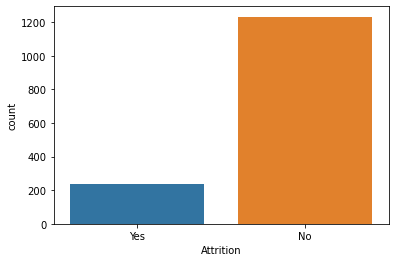

In [14]:
import seaborn as sns
sns.countplot(df["Attrition"]) # also for categorical variables, to plot.

In [15]:
df["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

**Found the "Travel Rarely" category is much more than the "Frequent" or "non-Travel categories".**

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

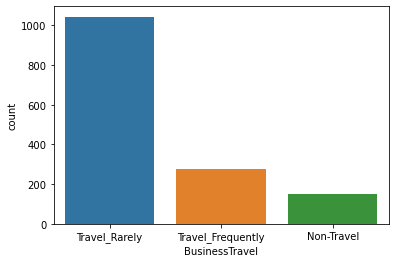

In [16]:
sns.countplot(df["BusinessTravel"])

In [17]:
df["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

**More people belong to R & D compared to Sales and HR**

<AxesSubplot:xlabel='Department', ylabel='count'>

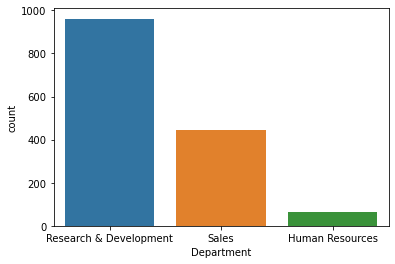

In [18]:
sns.countplot(df["Department"])

(array([503., 188., 249., 135.,  40.,  78.,  73.,  64.,  78.,  62.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <BarContainer object of 10 artists>)

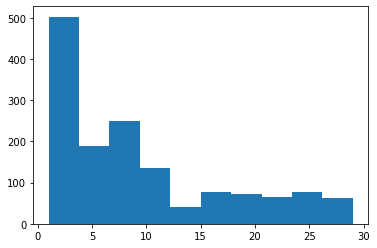

In [19]:
plt.hist(df['DistanceFromHome'])

**The above histogram on distance from home, is skewed to the left.**

In [20]:
df["Gender"].value_counts()


Male      882
Female    588
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

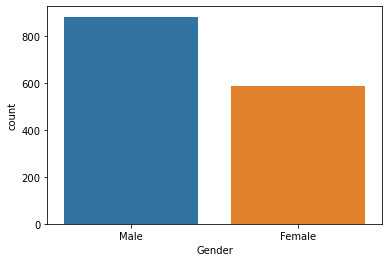

In [21]:
sns.countplot(df["Gender"])

**Distribution of males is slightly more than females.**


In [22]:
df['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

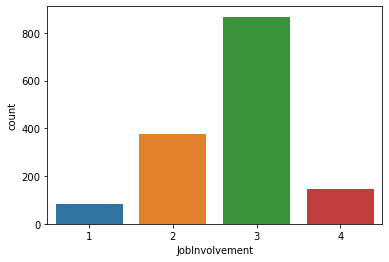

In [23]:
sns.countplot(df['JobInvolvement'])

**Job involvement 3 is more frequent.**

In [24]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

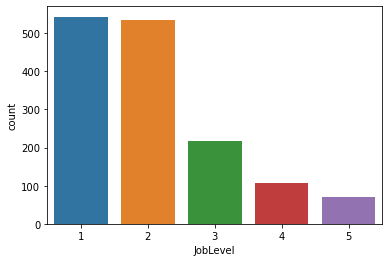

In [25]:
sns.countplot(df['JobLevel'])

**Job level 1 & 2 are much more frequent than 3,4,5.**

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64



<AxesSubplot:xlabel='JobRole', ylabel='count'>

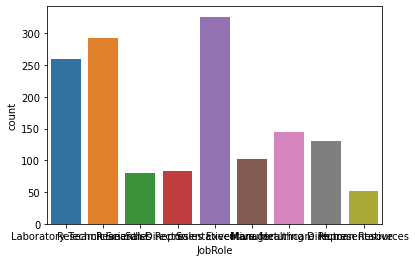

In [26]:
print(df['JobRole'].value_counts())
print("")
sns.countplot(df['JobRole'])

**The above plot shows that most of the employees were Sales executives, followed by Research scientists and Lab Technicians .**

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64



<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

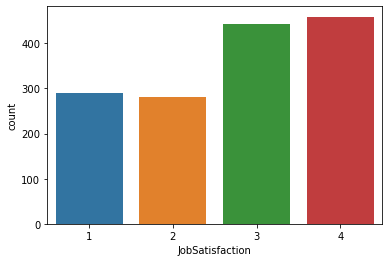

In [27]:
print(df['JobSatisfaction'].value_counts())
print("")
sns.countplot(df['JobSatisfaction'])

**The above plot shows that most of the employees had job satisfaction of 3 or 4.**

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64



<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

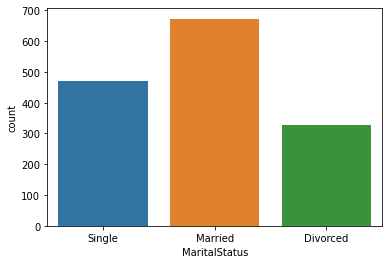

In [28]:
print(df['MaritalStatus'].value_counts())
print("")
sns.countplot(df['MaritalStatus'])

**The above plot shows that most of the employees were married.**

(array([365., 349., 290., 109., 110.,  56.,  52.,  18.,  54.,  67.]),
 array([ 1009.,  2908.,  4807.,  6706.,  8605., 10504., 12403., 14302.,
        16201., 18100., 19999.]),
 <BarContainer object of 10 artists>)

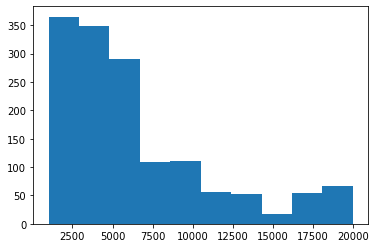

In [29]:
plt.hist(df["MonthlyIncome"])

**The above plot shows that most of the employees had salary scale of 2500 to 5000 range.**

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64



<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

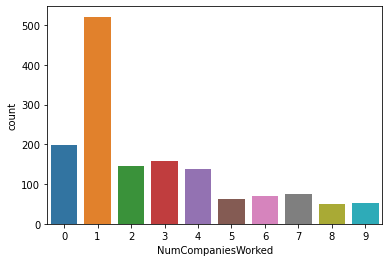

In [30]:
print(df['NumCompaniesWorked'].value_counts())
print("")
sns.countplot(df['NumCompaniesWorked'])

**The above plot shows that most of the employees had worked in another 1 company.**

No     1054
Yes     416
Name: OverTime, dtype: int64



<AxesSubplot:xlabel='OverTime', ylabel='count'>

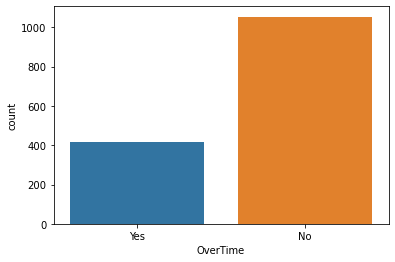

In [31]:
print(df['OverTime'].value_counts())
print("")
sns.countplot(df['OverTime'])

**The above plot shows that most of the employees didnot get OverTimes.**

(array([408., 209., 302.,  78.,  82., 165.,  55., 104.,  28.,  39.]),
 array([11. , 12.4, 13.8, 15.2, 16.6, 18. , 19.4, 20.8, 22.2, 23.6, 25. ]),
 <BarContainer object of 10 artists>)

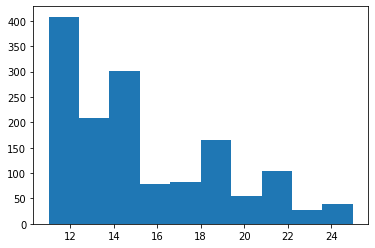

In [32]:
plt.hist(df["PercentSalaryHike"])

**The above plot shows that most of the employees received 12% salary hike, followed by 2nd highest numbers of employees received 14%.**

3    1244
4     226
Name: PerformanceRating, dtype: int64



<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

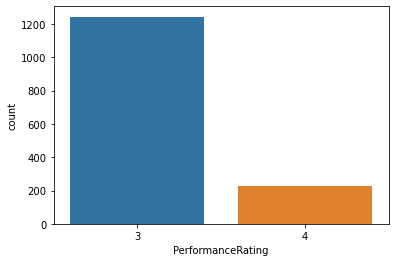

In [33]:
print(df['PerformanceRating'].value_counts())
print("")
sns.countplot(df['PerformanceRating'])

**The above plot shows that most of the employeeshad performance rating as 3.**

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64



<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

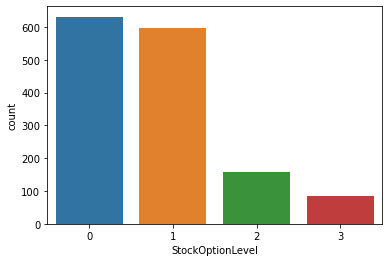

In [34]:
print(df['StockOptionLevel'].value_counts())
print("")
sns.countplot(df['StockOptionLevel'])

**The above plot shows that most of the employees had either 0 or 1 stock option level.**

(array([165., 357., 437., 155., 119., 107.,  53.,  40.,  24.,  13.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <BarContainer object of 10 artists>)

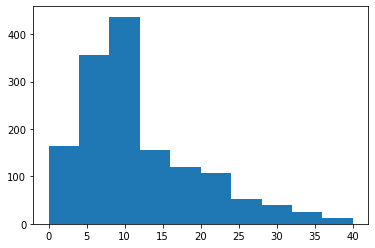

In [35]:
plt.hist(df["TotalWorkingYears"])

**The above plot shows that most of the employees had 10years of total working years.**

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64



<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

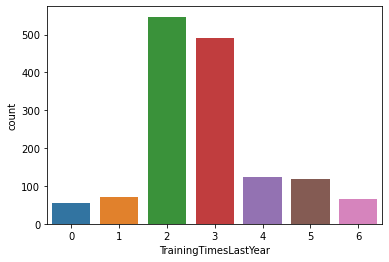

In [36]:
print(df['TrainingTimesLastYear'].value_counts())
print("")
sns.countplot(df['TrainingTimesLastYear'])

**The above plot shows that most of the employees received 2-3 trainings last year.**

(array([470., 472., 314.,  76.,  45.,  58.,  16.,   6.,   9.,   4.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <BarContainer object of 10 artists>)

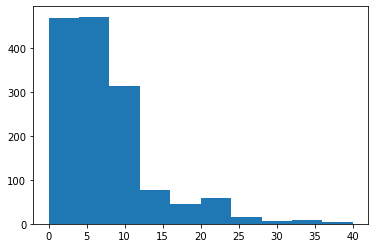

In [37]:
plt.hist(df["YearsAtCompany"])

**The above plot shows that most of the employees were in the company for 0-10years.** 
As the above values comes to upto 40, anything above 10-15 is better to take as continous.

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
12     10
13     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64



<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

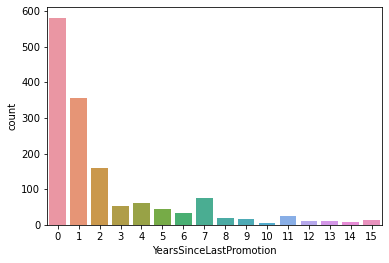

In [38]:
print(df['YearsSinceLastPromotion'].value_counts())
print("")
sns.countplot(df['YearsSinceLastPromotion'])

**The above plot shows that most employees had received promotion this  year.**

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64



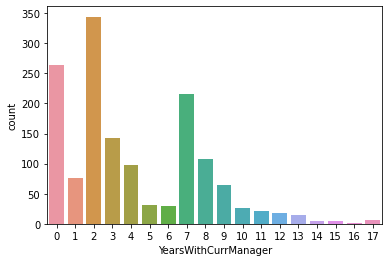

In [39]:
print(df['YearsWithCurrManager'].value_counts())
print("")
sns.countplot(df['YearsWithCurrManager']);

**The above plot shows that more employees were working with current manager for 2years.**

Post-Graduation    387
Graduation         367
PHD                358
12th               358
Name: Higher_Education, dtype: int64



<AxesSubplot:xlabel='Higher_Education', ylabel='count'>

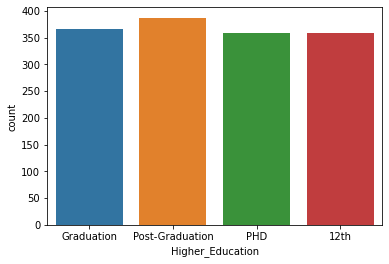

In [40]:
print(df['Higher_Education'].value_counts())
print("")
sns.countplot(df['Higher_Education'])

**The above plot shows almost equal distribution of Higher Education, with PG has slighlty higher counts.**

**Date are like historical values, doesnot make sense in plotting now. Hence omitting the Date of Hire**

Dept.Head             314
Salary                297
Work Environment      290
Work Accident         285
Better Opportunity    284
Name: Status_of_leaving, dtype: int64



<AxesSubplot:xlabel='Status_of_leaving', ylabel='count'>

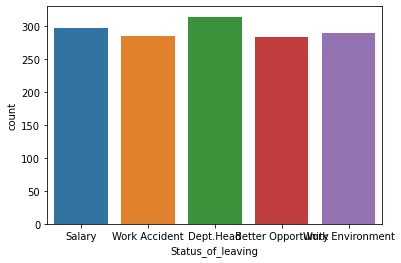

In [41]:
print(df['Status_of_leaving'].value_counts())
print("")
sns.countplot(df['Status_of_leaving'])

**The above plot shows almost equal distribution of Status of Leaving, with Department heads being at slightly higher frequency.**

WFH       768
OFFICE    702
Name: Mode_of_work, dtype: int64



<AxesSubplot:xlabel='Mode_of_work', ylabel='count'>

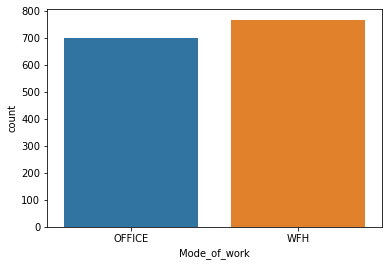

In [42]:
print(df['Mode_of_work'].value_counts())
print("")
sns.countplot(df['Mode_of_work'])

**The above plot shows almost equal distribution of Mode of work, with WFH is slighly higher frequency**

4    279
3    251
5    248
0    243
1    231
2    218
Name: Leaves, dtype: int64



<AxesSubplot:xlabel='Leaves', ylabel='count'>

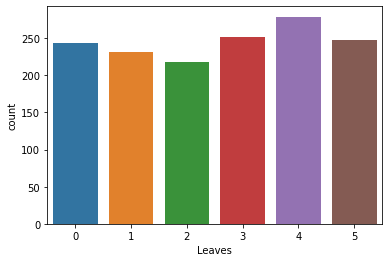

In [43]:
print(df['Leaves'].value_counts())
print("")
sns.countplot(df['Leaves'])

**The above plot shows almost equal distribution of Leaves, with highest being value at 4 and lowest at 2**

1    395
2    373
3    367
0    335
Name: Absenteeism, dtype: int64



<AxesSubplot:xlabel='Absenteeism', ylabel='count'>

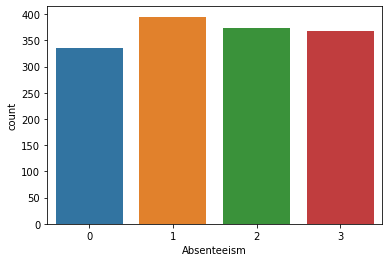

In [44]:
print(df['Absenteeism'].value_counts())
print("")
sns.countplot(df['Absenteeism'])

**The above plot shows almost equal distribution of Absenteeism, with value 1 being slightly highest**

No     736
Yes    734
Name: Work_accident, dtype: int64



<AxesSubplot:xlabel='Work_accident', ylabel='count'>

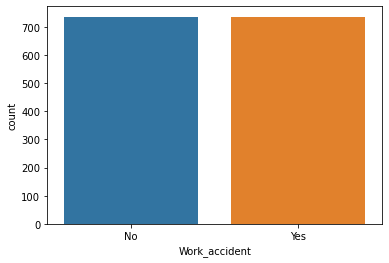

In [45]:
print(df['Work_accident'].value_counts())
print("")
sns.countplot(df['Work_accident'])

**The above plot shows almost equal distribution of Work-Accidents**

Recruiter     390
Job Event     372
Walk-in       361
Job Portal    347
Name: Source_of_Hire, dtype: int64



<AxesSubplot:xlabel='Source_of_Hire', ylabel='count'>

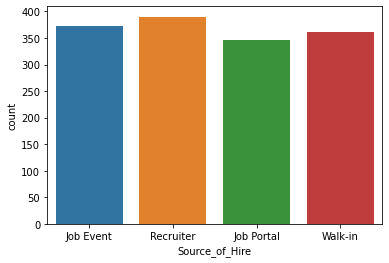

In [46]:
print(df['Source_of_Hire'].value_counts())
print("")
sns.countplot(df['Source_of_Hire'])

**The above plot shows almost equal distribution of Source-Of-Hire**

FullTime     517
Contract     482
Part Time    471
Name: Job_mode, dtype: int64



<AxesSubplot:xlabel='Job_mode', ylabel='count'>

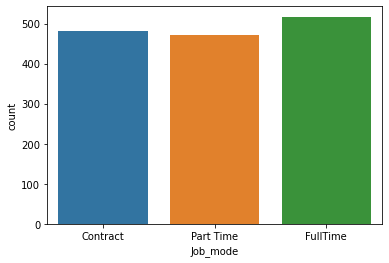

In [47]:
print(df['Job_mode'].value_counts())
print("")
sns.countplot(df['Job_mode'])

**The above plot shows almost equal distribution of contract types**


In [48]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,YearsWithCurrManager,Higher_Education,Date_of_Hire,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,0,Graduation,21-01-2021,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,0,Graduation,13-03-2021,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,0,Post-Graduation,23-01-2021,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,0,PHD,25-04-2021,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,0,PHD,14-06-2021,Better Opportunity,WFH,5,2,No,Job Event,Contract


## 1.5 Compare each column with Attrition column (target variable). BiVariate Analysis.

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

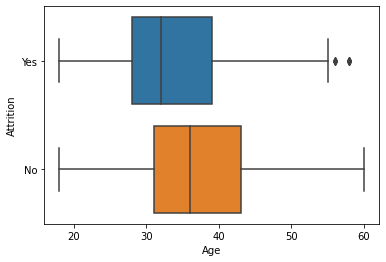

In [49]:
sns.boxplot(x="Age", y="Attrition", data=df)

**As the shape of the boxes r different, means the Age and Attrition are related.** BoxPlot is implemented for continous variables vs categorical.

Attrition           No  Yes
BusinessTravel             
Non-Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156



<AxesSubplot:xlabel='BusinessTravel'>

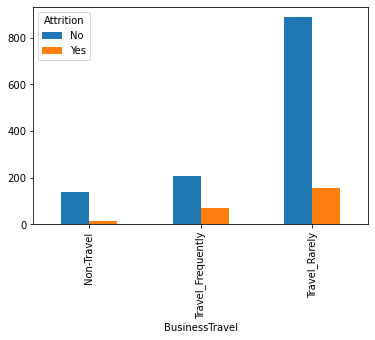

In [50]:
print(pd.crosstab(df["BusinessTravel"], df["Attrition"]))
print("")
pd.crosstab(df["BusinessTravel"], df["Attrition"]).plot.bar()

**The 'Travel-Rarely' category, highly affects the attrition.**
(For categorical vs categorical data, use pd.crosstab.)

Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92



<AxesSubplot:xlabel='Department'>

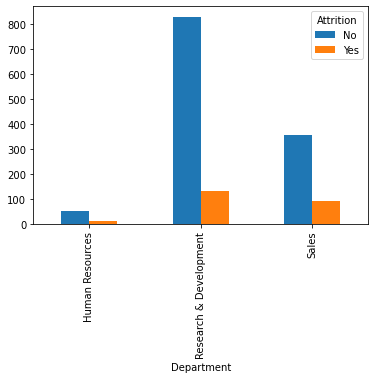

In [51]:
print(pd.crosstab(df["Department"], df["Attrition"]))
print("")
pd.crosstab(df["Department"], df["Attrition"]).plot.bar()

**R & D department & Sales depatment has more attrition in counts.** 

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Attrition'>

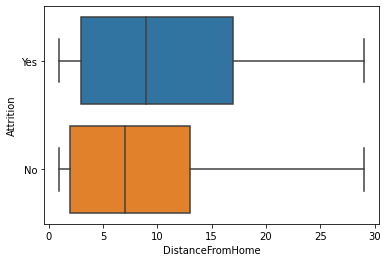

In [52]:
sns.boxplot(x="DistanceFromHome", y="Attrition", data=df)

**As the boxes are different, there is a correlation between DistanceFromHome and attrition**

Attrition   No  Yes
Gender             
Female     501   87
Male       732  150



<AxesSubplot:xlabel='Gender'>

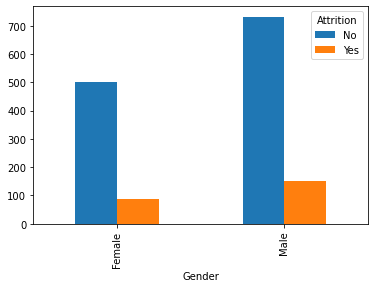

In [53]:
print(pd.crosstab(df["Gender"], df["Attrition"]))
print("")
pd.crosstab(df["Gender"], df["Attrition"]).plot.bar()

**Males have more attrition, compared to females**

Attrition        No  Yes
JobInvolvement          
1                55   28
2               304   71
3               743  125
4               131   13



<AxesSubplot:xlabel='JobInvolvement'>

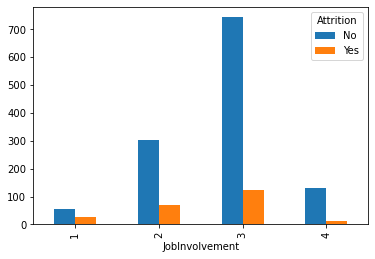

In [54]:
print(pd.crosstab(df["JobInvolvement"], df["Attrition"]))
print("")
pd.crosstab(df["JobInvolvement"], df["Attrition"]).plot.bar()

**Job involvement 3 has more attrition, immediately followed by 2.**

Attrition   No  Yes
JobLevel           
1          400  143
2          482   52
3          186   32
4          101    5
5           64    5



<AxesSubplot:xlabel='JobLevel'>

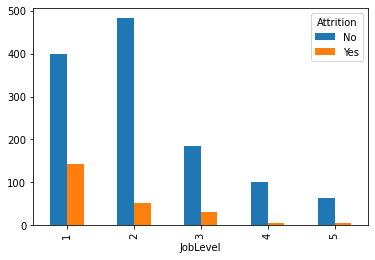

In [55]:
print(pd.crosstab(df["JobLevel"], df["Attrition"]))
print("")
pd.crosstab(df["JobLevel"], df["Attrition"]).plot.bar()

**JobLevel 1 has more attrition, followed by JobLevel 2.**

Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33



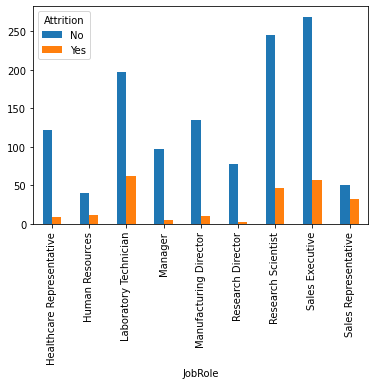

In [56]:
print(pd.crosstab(df["JobRole"], df["Attrition"]))
print("")
pd.crosstab(df["JobRole"], df["Attrition"]).plot.bar();

**Sales Executives & Research scientists have more attrition, followed by Lab technicians, than others.**

Attrition         No  Yes
JobSatisfaction          
1                223   66
2                234   46
3                369   73
4                407   52



<AxesSubplot:xlabel='JobSatisfaction'>

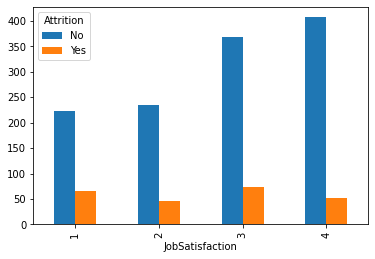

In [57]:
print(pd.crosstab(df["JobSatisfaction"], df["Attrition"]))
print("")
pd.crosstab(df["JobSatisfaction"], df["Attrition"]).plot.bar()

**Fairly equal distribution of attrition among job satisfaction, with 3 being the highest and 2 being lowest attrition.**

Attrition       No  Yes
MaritalStatus          
Divorced       294   33
Married        589   84
Single         350  120



<AxesSubplot:xlabel='MaritalStatus'>

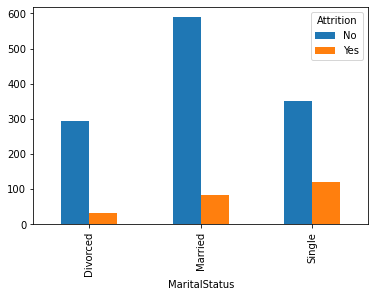

In [58]:
print(pd.crosstab(df["MaritalStatus"], df["Attrition"]))
print("")
pd.crosstab(df["MaritalStatus"], df["Attrition"]).plot.bar()

**Singles are having more attrition, follwed by married**

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Attrition'>

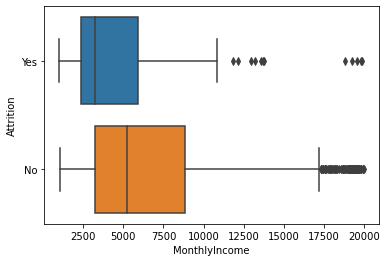

In [59]:
sns.boxplot(x="MonthlyIncome", y="Attrition", data=df)

**As the boxes are different size, means monthly income has a correlation to Attrition.**

Attrition            No  Yes
NumCompaniesWorked          
0                   174   23
1                   423   98
2                   130   16
3                   143   16
4                   122   17
5                    47   16
6                    54   16
7                    57   17
8                    43    6
9                    40   12


<AxesSubplot:xlabel='NumCompaniesWorked'>

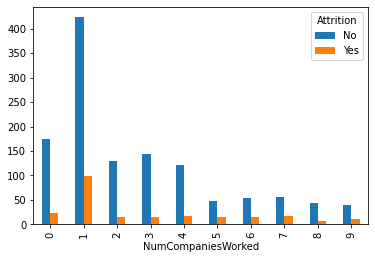

In [60]:
print(pd.crosstab(df["NumCompaniesWorked"], df["Attrition"]))
pd.crosstab(df["NumCompaniesWorked"], df["Attrition"]).plot.bar()



**Attrition is high for those with 1 nos of companies worked.**

Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127


<AxesSubplot:xlabel='OverTime'>

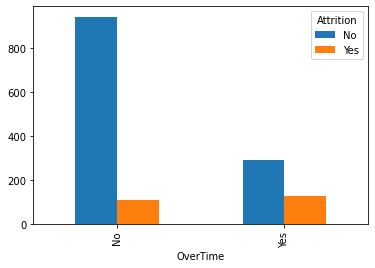

In [61]:
print(pd.crosstab(df["OverTime"], df["Attrition"]))
pd.crosstab(df["OverTime"], df["Attrition"]).plot.bar()

**Attrition is slightly higher with employees having overtime.**

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Attrition'>

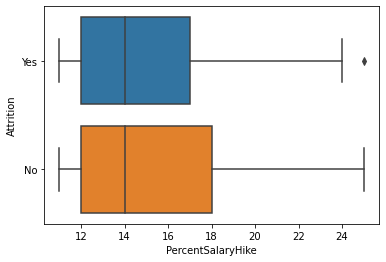

In [62]:
sns.boxplot(x="PercentSalaryHike", y="Attrition", data=df)

**Employees having less Percentage Salary Hike are more prone to Attrition**

Attrition            No  Yes
PerformanceRating           
3                  1044  200
4                   189   37


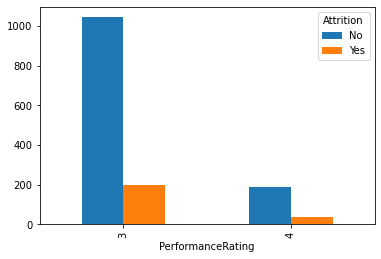

In [63]:
print(pd.crosstab(df["PerformanceRating"], df["Attrition"]))

pd.crosstab(df["PerformanceRating"], df["Attrition"]).plot.bar(); 


**Attrition is high for performance rating of 3.**

Attrition          No  Yes
StockOptionLevel          
0                 477  154
1                 540   56
2                 146   12
3                  70   15



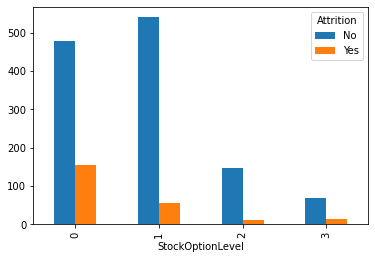

In [64]:
print(pd.crosstab(df["StockOptionLevel"], df["Attrition"]))
print("")
pd.crosstab(df["StockOptionLevel"], df["Attrition"]).plot.bar();

**Attrition is highest for stock option level 0.**

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Attrition'>

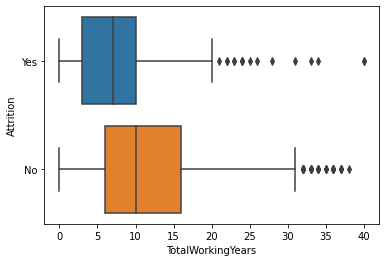

In [65]:
sns.boxplot(x="TotalWorkingYears", y="Attrition", data=df)

**The different sizes of box indicates there that the total working years affects the attrition.**

Attrition               No  Yes
TrainingTimesLastYear          
0                       39   15
1                       62    9
2                      449   98
3                      422   69
4                       97   26
5                      105   14
6                       59    6



<AxesSubplot:xlabel='TrainingTimesLastYear'>

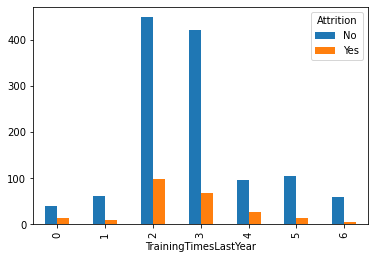

In [66]:
print(pd.crosstab(df["TrainingTimesLastYear"], df["Attrition"]))
print("")
pd.crosstab(df["TrainingTimesLastYear"], df["Attrition"]).plot.bar()



**Attrition was higher for those who took 2 to 3 trainings last year.**

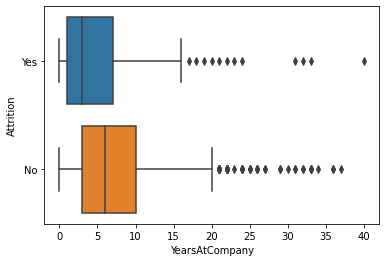

In [67]:
sns.boxplot(x="YearsAtCompany", y="Attrition", data=df);

**Different box types suggests higher correlation between years at the company and Attrition.**

Attrition                 No  Yes
YearsSinceLastPromotion          
0                        471  110
1                        308   49
2                        132   27
3                         43    9
4                         56    5
5                         43    2
6                         26    6
7                         60   16
8                         18    0
9                         13    4
10                         5    1
11                        22    2
12                        10    0
13                         8    2
14                         8    1
15                        10    3



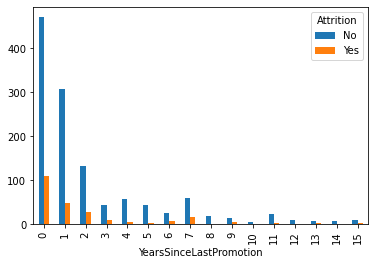

In [68]:
print(pd.crosstab(df["YearsSinceLastPromotion"], df["Attrition"]))
print("")
pd.crosstab(df["YearsSinceLastPromotion"], df["Attrition"]).plot.bar();

**Those who are recently promoted are more in Attrition.**

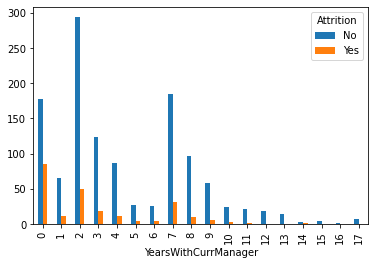

In [69]:
pd.crosstab(df["YearsWithCurrManager"], df["Attrition"])
print("")
pd.crosstab(df["YearsWithCurrManager"], df["Attrition"]).plot.bar();

**Whoever are working with current manager for 2years, had higher attrition. Followed by recently started working with current manager or of 7 years.**

Attrition          No  Yes
Higher_Education          
12th              300   58
Graduation        309   58
PHD               301   57
Post-Graduation   323   64



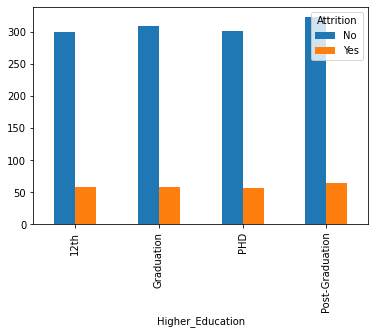

In [70]:
print(pd.crosstab(df["Higher_Education"], df["Attrition"]))
print("")
pd.crosstab(df["Higher_Education"], df["Attrition"]).plot.bar();

**Attrition is same for all levels of higher education**

**"Date_of_Hire" is generally not plotted, hence ignored for now.**

Attrition            No  Yes
Status_of_leaving           
Better Opportunity  243   41
Dept.Head           268   46
Salary              245   52
Work Accident       230   55
Work Environment    247   43



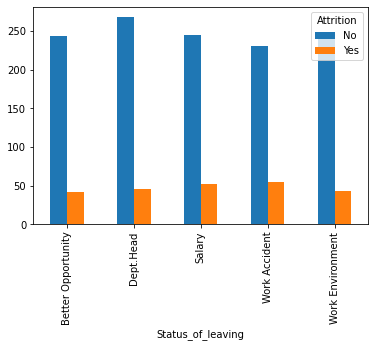

In [71]:
print(pd.crosstab(df["Status_of_leaving"], df["Attrition"]))
print("")
pd.crosstab(df["Status_of_leaving"], df["Attrition"]).plot.bar();

**Attrition is not much related to status of leaving the company. However, comparatively work environment causes less attrition and work accidents cause more attritions.**

Attrition      No  Yes
Mode_of_work          
OFFICE        587  115
WFH           646  122



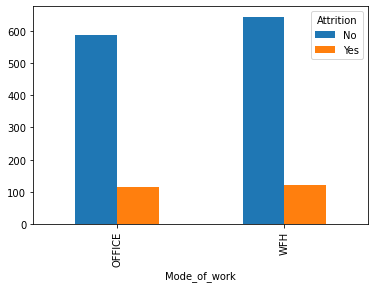

In [72]:
print(pd.crosstab(df["Mode_of_work"], df["Attrition"]))
print("")
pd.crosstab(df["Mode_of_work"], df["Attrition"]).plot.bar();

**Mode of work has almost no correlation to attrition**

Attrition   No  Yes
Leaves             
0          193   50
1          186   45
2          192   26
3          222   29
4          230   49
5          210   38



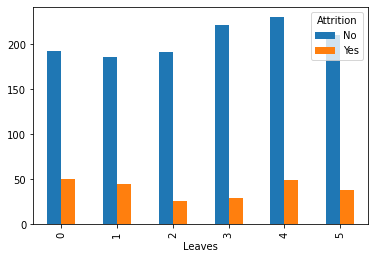

In [73]:
print(pd.crosstab(df["Leaves"], df["Attrition"]))
print("")
pd.crosstab(df["Leaves"], df["Attrition"]).plot.bar();

**Those who took 4 number of leaves are more prone to attrition than who took 2 leaves.**

Attrition     No  Yes
Absenteeism          
0            276   59
1            328   67
2            312   61
3            317   50



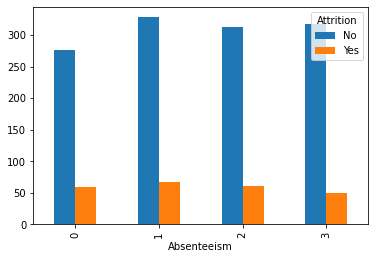

In [74]:
print(pd.crosstab(df["Absenteeism"], df["Attrition"]))
print("")
pd.crosstab(df["Absenteeism"], df["Attrition"]).plot.bar();

**All abesnteeism has almost similar effect of Attrition. However, absenteeism of 3 had lowest attrition and of 1 had highest attrition.**

Attrition       No  Yes
Work_accident          
No             620  116
Yes            613  121



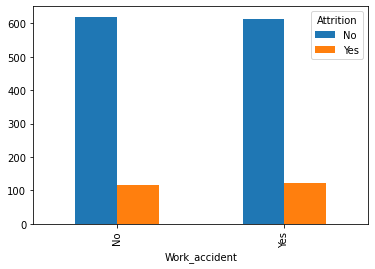

In [75]:
print(pd.crosstab(df["Work_accident"], df["Attrition"]))
print("")
pd.crosstab(df["Work_accident"], df["Attrition"]).plot.bar();

**Work accident doesnot seem to have any correlation with attrition.**

Attrition        No  Yes
Source_of_Hire          
Job Event       315   57
Job Portal      288   59
Recruiter       327   63
Walk-in         303   58



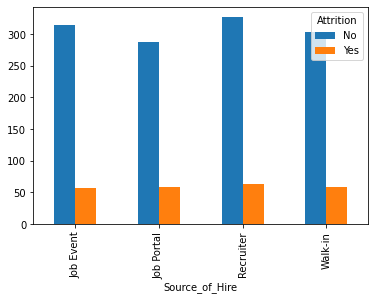

In [76]:
print(pd.crosstab(df["Source_of_Hire"], df["Attrition"]))
print("")
pd.crosstab(df["Source_of_Hire"], df["Attrition"]).plot.bar();

**Source of hire seems to have very little effect of attrition.**

Attrition   No  Yes
Job_mode           
Contract   394   88
FullTime   430   87
Part Time  409   62



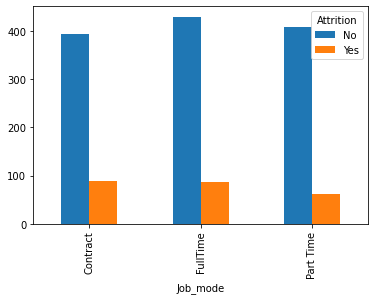

In [77]:
print(pd.crosstab(df["Job_mode"], df["Attrition"]))
print("")
pd.crosstab(df["Job_mode"], df["Attrition"]).plot.bar();

**Contract and full time staffs can be seen as more prone to attrition**

In [78]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,YearsWithCurrManager,Higher_Education,Date_of_Hire,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,0,Graduation,21-01-2021,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,0,Graduation,13-03-2021,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,0,Post-Graduation,23-01-2021,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,0,PHD,25-04-2021,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,0,PHD,14-06-2021,Better Opportunity,WFH,5,2,No,Job Event,Contract


In [79]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,YearsWithCurrManager,Higher_Education,Date_of_Hire,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,0,Graduation,21-01-2021,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,0,Graduation,13-03-2021,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,0,Post-Graduation,23-01-2021,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,0,PHD,25-04-2021,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,0,PHD,14-06-2021,Better Opportunity,WFH,5,2,No,Job Event,Contract


In [80]:
df.select_dtypes("object").columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'Higher_Education', 'Date_of_Hire',
       'Status_of_leaving', 'Mode_of_work', 'Work_accident', 'Source_of_Hire',
       'Job_mode'],
      dtype='object')

**Convert Categorical data to numeric data** using LabelEncoder from SKLearn.

In [81]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in df.select_dtypes("object").columns:
  df[i]=encoder.fit_transform(df[i])


In [82]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,YearsWithCurrManager,Higher_Education,Date_of_Hire,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,1,2,1,2,1,2,1,2,3,...,0,1,729,2,0,4,2,0,0,0
1,21,0,2,1,15,1,3,1,6,4,...,0,1,439,3,1,5,2,0,2,2
2,45,0,2,1,6,1,3,3,5,1,...,0,3,796,1,1,1,3,0,0,0
3,23,0,2,2,2,1,3,1,8,1,...,0,2,905,3,0,1,0,1,2,1
4,22,0,2,1,15,0,3,1,2,4,...,0,2,497,0,1,5,2,0,0,0


## 1.6 Correlation Matrix

<AxesSubplot:>

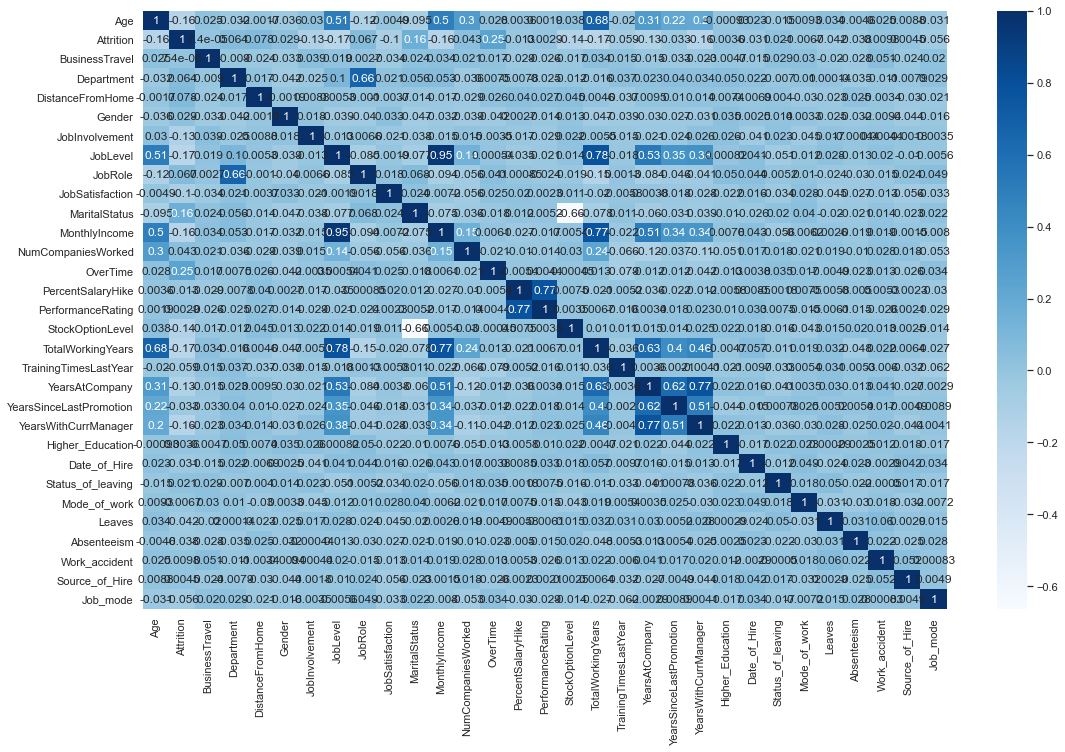

In [83]:
import seaborn as sns
sns.set(rc={"figure.figsize":(18, 11)})
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [84]:
df.corr()['Attrition']>0.4

Age                        False
Attrition                   True
BusinessTravel             False
Department                 False
DistanceFromHome           False
Gender                     False
JobInvolvement             False
JobLevel                   False
JobRole                    False
JobSatisfaction            False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
OverTime                   False
PercentSalaryHike          False
PerformanceRating          False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
Higher_Education           False
Date_of_Hire               False
Status_of_leaving          False
Mode_of_work               False
Leaves                     False
Absenteeism                False
Work_accident              False
Source_of_Hire             False
Job_mode  

In [85]:
x = df.drop(["Attrition"], axis = 1) #Use all other cols in x other than Attrition.

In [86]:
y = df["Attrition"] 

## 1.7 Some more BiVarite Analysis based on Correlations


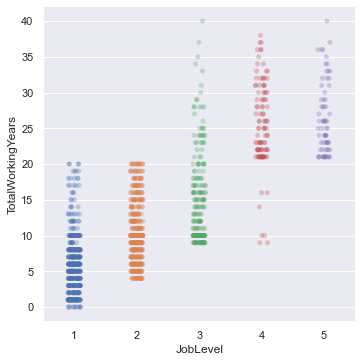

In [87]:
sns.catplot(y = 'TotalWorkingYears', x = 'JobLevel',data = df,alpha = 0.3);

**MultiVariate Analyzis of correlated values**

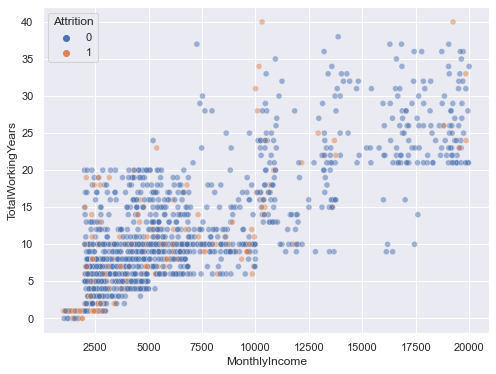

In [88]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'MonthlyIncome',y = 'TotalWorkingYears',data = df, hue = 'Attrition',alpha = 0.5);

**Normalization** - Scaling the dataset

In [89]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

# 2. Model Building

## 2.1 SPLITTING DATA INTO TRAINING AND TESTING SETS (80/20)

In [90]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=0) #seggregating dataset 20% as test, random_state for ? reprodcibility of code

**SCALING**

In [91]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

## 2.2 Model 1: BASELINE MODEL -- LOGISTIC REGRESSION

In [92]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = model.predict(xtest)

In [94]:
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [95]:
confusion_matrix(ytest, y_pred)

array([[244,   5],
       [ 34,  11]], dtype=int64)

**The number of True positives are 249 while as the number of True negatives are 3.**

In [96]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       249
           1       0.69      0.24      0.36        45

    accuracy                           0.87       294
   macro avg       0.78      0.61      0.64       294
weighted avg       0.85      0.87      0.84       294



**The Precision for category 0 is 86% with a recall of 100%. While as the precision for category 1 is 100% and recall is only 7% using a baseline model that is logistic regression.**

In [97]:
accuracy_score(ytest, y_pred) * 100

86.73469387755102

**The accuracy for the model that we have chosen as a baseline model is approximately 86% but looking at the recall for category 1 it seems like this is not the appropriate model for the data.**

In [98]:
model.score(xtest, ytest)

0.8673469387755102

## 2.3 Model 2: Try using a Decision Tree Classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)


DecisionTreeClassifier()

In [101]:
confusion_matrix(ytest,dt.predict(xtest))

array([[212,  37],
       [ 32,  13]], dtype=int64)

**The True positives are 208 in number and True negatives are 14 in number when we use a tree based model that is decision tree classifier. The number of false positives and false negatives are 41 and 31 respectively**

In [102]:
print(classification_report(ytest, dt.predict(xtest)))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       249
           1       0.26      0.29      0.27        45

    accuracy                           0.77       294
   macro avg       0.56      0.57      0.57       294
weighted avg       0.78      0.77      0.77       294



**The precision for the category 0 is 87%, while recall is 84%. And the precision for category 1 is 25%  and the recall is 31%.**

In [103]:
accuracy_score(ytest, dt.predict(xtest))

0.7653061224489796

**The accuracy has drastically dropped by using Tree baased model that is a decision tree classifier**

## 2.4 Model 3: Random Forest Classifier.

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [105]:
confusion_matrix(ytest, rfc.predict(xtest))

array([[243,   6],
       [ 36,   9]], dtype=int64)

**The True positives are 242 and True negatives are 8 for the RandomForest Classifier model. Also the false positives are 7 and false negatives are 37**

In [106]:
print(classification_report(ytest, rfc.predict(xtest)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       249
           1       0.60      0.20      0.30        45

    accuracy                           0.86       294
   macro avg       0.74      0.59      0.61       294
weighted avg       0.83      0.86      0.83       294



**The precision for category 0 is 87% while recall is 97%. The precision for category 1 is 57%, while the recall is around 18%.**

In [107]:
accuracy_score(ytest, rfc.predict(xtest))*100

85.71428571428571

**The accuracy for the RFC model is 85.03%, that is less than the LR model.**

## 2.5 Model 4: Boosting algorithms 

In [108]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [109]:
xgb_pred=xgb.predict(xtest)
confusion_matrix(ytest,xgb_pred)

array([[237,  12],
       [ 26,  19]], dtype=int64)

The True Positives are 241 and TN are 16 in number while as the FP and FN are 8 and 29 for xgboost model

In [110]:
print(classification_report(ytest,xgb_pred))


              precision    recall  f1-score   support

           0       0.90      0.95      0.93       249
           1       0.61      0.42      0.50        45

    accuracy                           0.87       294
   macro avg       0.76      0.69      0.71       294
weighted avg       0.86      0.87      0.86       294



The precision for category 0 is 89 percent with recall of 97% and precision for category 1 is 67 % with recall of 36 %.With f1  score of 93% and 46% respectively.

In [111]:
accuracy_score(ytest,xgb_pred)

0.8707482993197279

The accuracy score has improved slighly by using a boosting algorithm that is XGBOOST CLF

ACC_SCORE=87.414%

## 2.6 Model 5: ADABOOST CLASSIFIER (With hyperparameter tuning)

Note: Takes approx 5mins

In [112]:
# Initialize the classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,fbeta_score
from time import time
import numpy as np
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

# Create the parameters list 
parameters = {'n_estimators':[50,75,100,200], 
              'learning_rate':[0.05,0.1,0.3,1], 
              'base_estimator__min_samples_split' : np.arange(2, 8, 2),
              'base_estimator__max_depth' : np.arange(1, 4, 1)}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

start = time()
# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(xtrain, ytrain)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(xtrain, ytrain)).predict(xtest)
best_predictions = best_clf.predict(xtest)
end = time()

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(ytest, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(ytest, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(ytest, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(ytest, best_predictions, beta = 0.5)))
print("--- Run time: %s mins ---" % np.round(((end - start)/60),2))

Unoptimized model
------
Accuracy score on testing data: 0.7687
F-score on testing data: 0.2811

Optimized Model
------
Final accuracy score on the testing data: 0.8605
Final F-score on the testing data: 0.5249
--- Run time: 4.74 mins ---


In [113]:
print(best_clf)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, random_state=42)


**Using the tuned model**

In [114]:
model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, random_state=42)
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
confusion_matrix(ytest,y_pred)



array([[234,  15],
       [ 26,  19]], dtype=int64)

- Results: ADABOOST TUNED MODEL
 - TP=234
 - FP=15
 - FN=26
 - TN=19

In [115]:
print(classification_report(ytest,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.94      0.92       249
           1       0.56      0.42      0.48        45

    accuracy                           0.86       294
   macro avg       0.73      0.68      0.70       294
weighted avg       0.85      0.86      0.85       294



In [116]:
accuracy_score(ytest,y_pred)

0.8605442176870748

## 2.7 Best Model 

**Outputs**

**Category 0**
- Recall=94%
- Precision=90%
- F-Score=92

**Category 1**
- Recall=42%
- Precision=56%
- F-Score=48%

**Accuracy = 86.054 %**

### Confusion Matrix

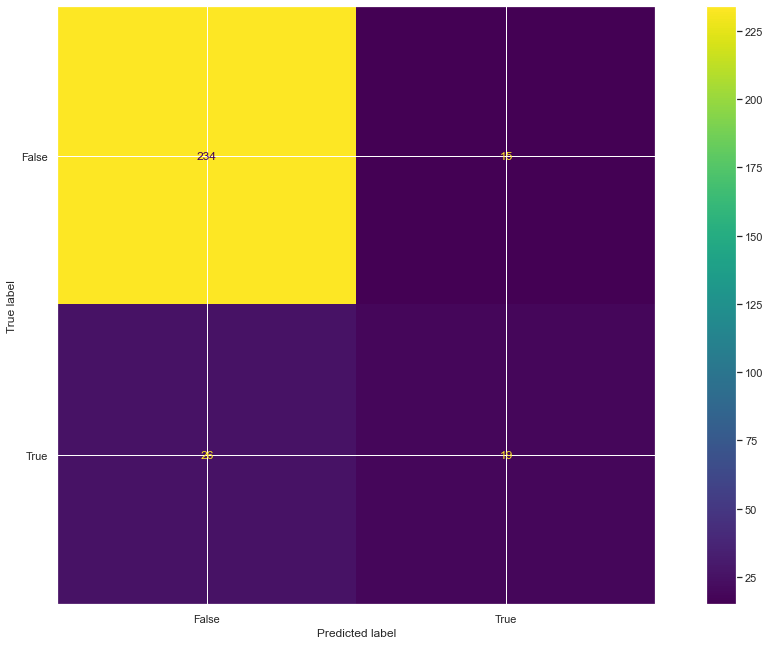

In [117]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(ytest,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show;

## 2.8 Feature Importances

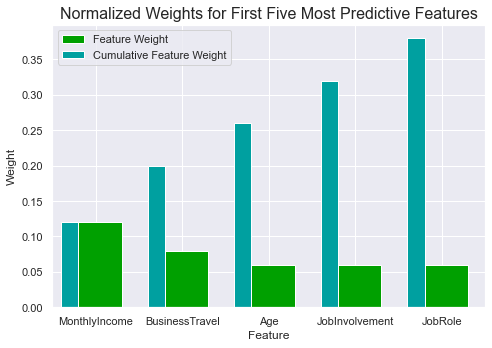

In [118]:
# Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(random_state=42).fit(xtrain, ytrain)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Display the five most important features
indices = np.argsort(importances)[::-1]
columns = x.columns.values[indices[:5]]
values = importances[indices][:5]

# Creat the plot
fig = plt.figure(figsize = (7,5))
plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', label = "Feature Weight")
plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
        label = "Cumulative Feature Weight")
plt.xticks(np.arange(5), columns)
plt.xlim((-0.5, 4.5))
plt.ylabel("Weight", fontsize = 12)
plt.xlabel("Feature", fontsize = 12)
    
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()  

As evident from the above feature importance plot monthy income is the most important feature

## 2.9 DEEP LEARNING APPROACH (using Neural Networks) 

In [119]:
xtrain.shape

(1176, 30)

In [120]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(64,input_shape=(30,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10,verbose=2)


Epoch 1/10
37/37 - 1s - loss: 0.4917 - accuracy: 0.8180 - val_loss: 0.4151 - val_accuracy: 0.8469 - 939ms/epoch - 25ms/step
Epoch 2/10
37/37 - 0s - loss: 0.4090 - accuracy: 0.8367 - val_loss: 0.3859 - val_accuracy: 0.8469 - 75ms/epoch - 2ms/step
Epoch 3/10
37/37 - 0s - loss: 0.3750 - accuracy: 0.8452 - val_loss: 0.3621 - val_accuracy: 0.8605 - 72ms/epoch - 2ms/step
Epoch 4/10
37/37 - 0s - loss: 0.3474 - accuracy: 0.8554 - val_loss: 0.3476 - val_accuracy: 0.8605 - 75ms/epoch - 2ms/step
Epoch 5/10
37/37 - 0s - loss: 0.3253 - accuracy: 0.8690 - val_loss: 0.3394 - val_accuracy: 0.8469 - 73ms/epoch - 2ms/step
Epoch 6/10
37/37 - 0s - loss: 0.3034 - accuracy: 0.8784 - val_loss: 0.3354 - val_accuracy: 0.8537 - 74ms/epoch - 2ms/step
Epoch 7/10
37/37 - 0s - loss: 0.2845 - accuracy: 0.8903 - val_loss: 0.3407 - val_accuracy: 0.8537 - 74ms/epoch - 2ms/step
Epoch 8/10
37/37 - 0s - loss: 0.2673 - accuracy: 0.8954 - val_loss: 0.3429 - val_accuracy: 0.8571 - 75ms/epoch - 2ms/step
Epoch 9/10
37/37 - 0s 

In [122]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the Results and checking the performance of the model**

In [123]:
model_history = pd.DataFrame(history.history)
model_history

,loss,accuracy,val_loss,val_accuracy
0,0.491724,0.818027,0.415066,0.846939
1,0.408964,0.836735,0.385948,0.846939
2,0.374995,0.845238,0.362126,0.860544
3,0.347388,0.855442,0.347639,0.860544
4,0.325276,0.869048,0.339409,0.846939
5,0.303356,0.878401,0.335395,0.853741
6,0.284535,0.890306,0.340667,0.853741
7,0.267344,0.895408,0.342928,0.857143
8,0.249430,0.900510,0.340312,0.853741
9,0.231151,0.909014,0.353918,0.846939


In [124]:
import numpy as np
y_pred = model.predict(xtest)
y_pred = [1 if i >0.5 else 0 for i in y_pred]
model.evaluate(xtest,ytest)

10/10 [==============================] - 0s 1ms/step - loss: 0.3539 - accuracy: 0.8469


[0.35391807556152344, 0.8469387888908386]

In [125]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       249
           1       0.50      0.31      0.38        45

    accuracy                           0.85       294
   macro avg       0.69      0.63      0.65       294
weighted avg       0.82      0.85      0.83       294



**The neural networks DL model is not as good as ADABoost model. Hence ADABoost model has been selected for prediction of Attrition.**